<a href="https://colab.research.google.com/github/emely3h/Geospatial_ML/blob/main/image_processing/filtering_frequency_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
! ls

Mounted at /content/drive
drive  sample_data


In [2]:
%cd drive/MyDrive/MachineLearning/
#! git clone https://github.com/emely3h/Geospatial_ML.git
%cd Geospatial_ML
! ls

/content/drive/.shortcut-targets-by-id/15HUD3sGdfvxy5Y_bjvuXgrzwxt7TzRfm/MachineLearning
/content/drive/.shortcut-targets-by-id/15HUD3sGdfvxy5Y_bjvuXgrzwxt7TzRfm/MachineLearning/Geospatial_ML
data_exploration  evaluation   models	    prepare_data    README.md
docs		  experiments  poetry.lock  pyproject.toml  requirements.txt


In [35]:
import numpy as np
import os
from matplotlib import pyplot as plt
import tensorflow as tf
from skimage import io,filters
from skimage.color import rgb2gray

In [15]:
root = "../data_colab/256_256/"

y_mask  = np.load(os.path.join(root,'2022_06_20.npz'))['y_mask']
x_input  = np.load(os.path.join(root,'2022_06_20.npz'))['x_input']

print(x_input.shape)
print(y_mask.shape)

(761, 256, 256, 5)
(761, 256, 256)


In [20]:

def display_image(display_list):
  plt.figure(figsize=(7, 7))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    if len(display_list[i].shape) == 3:
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        #plt.axis('off')
    else:
        plt.imshow(display_list[i])
  plt.show()

def display(list_train, list_mask):
  for idx, img_train in enumerate(list_train):
    sample_image, sample_mask = list_train[idx], list_mask[idx]
    sample_image = sample_image[..., :4]
    display_image([sample_image, sample_mask])
     

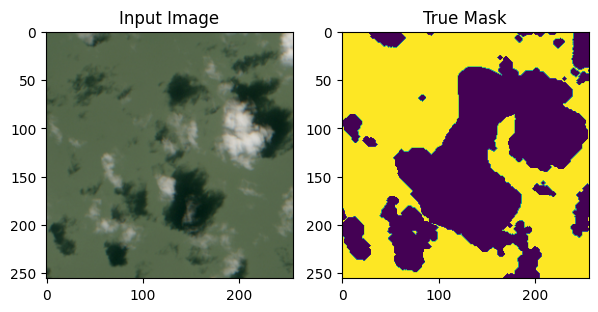

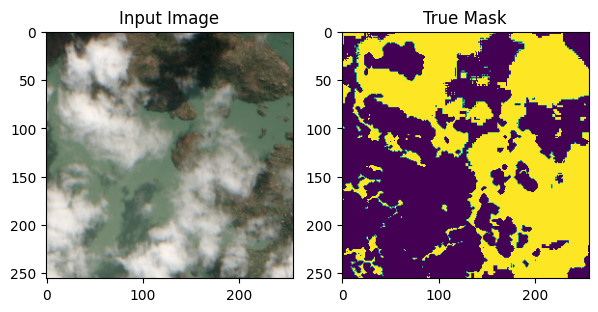

In [24]:
display(x_input[130:132], y_mask[130:132])

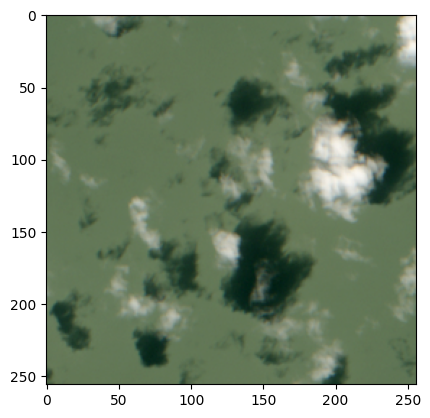

In [31]:
test = x_input[130][..., :3]
plt.imshow(tf.keras.utils.array_to_img(test))
plt.show()


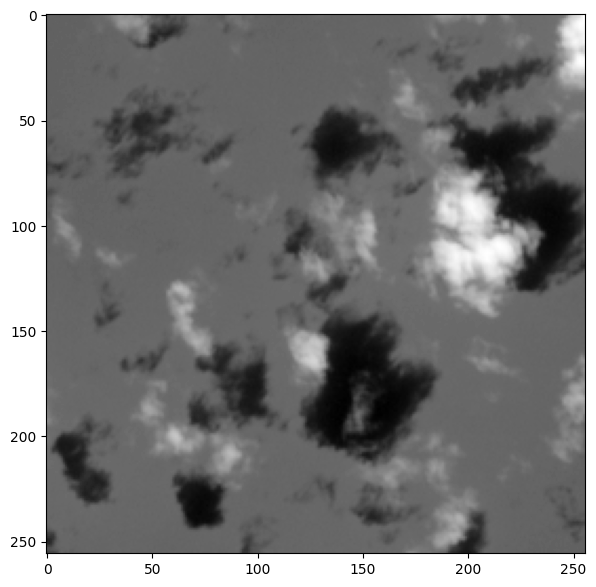

In [42]:
gray = rgb2gray(test)
plt.figure(figsize=(7, 7))
plt.imshow(gray, cmap='gray')
plt.show()

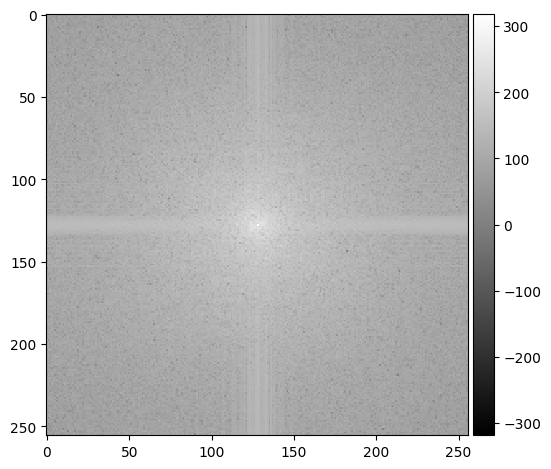

In [46]:
import numpy as np
from skimage import io, color, img_as_float
from scipy.fftpack import fft2, fftshift

# Convert the image to a float array
image = img_as_float(gray)

# Compute the 2D Fourier transform
f = fft2(image)

# Shift the zero-frequency component to the center of the spectrum
fshift = fftshift(f)

# Compute the magnitude spectrum
magnitude_spectrum = np.abs(fshift)

# log scale
magnitude_spectrum = 20 * np.log(np.abs(fshift))


# Display the magnitude spectrum
io.imshow(magnitude_spectrum, cmap='gray')
io.show()

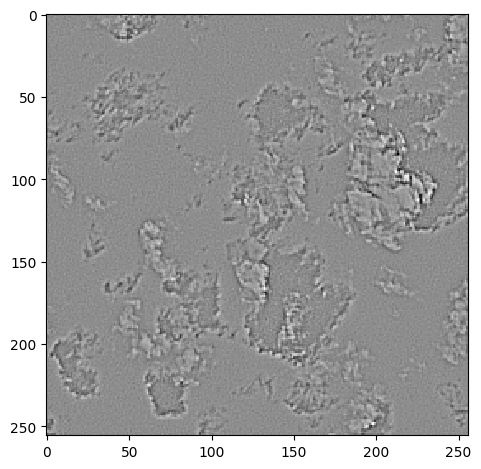

In [47]:
import numpy as np
from skimage import io, color, img_as_float
from scipy import ndimage

# Convert the image to a float array
image = img_as_float(gray)

# Define a high-pass filter kernel
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# Apply the high-pass filter using convolution
filtered_image = ndimage.convolve(image, kernel)

# Normalize the pixel values to the range [0, 1]
filtered_image = (filtered_image - filtered_image.min()) / (filtered_image.max() - filtered_image.min())

# Display the filtered image
io.imshow(filtered_image)
io.show()

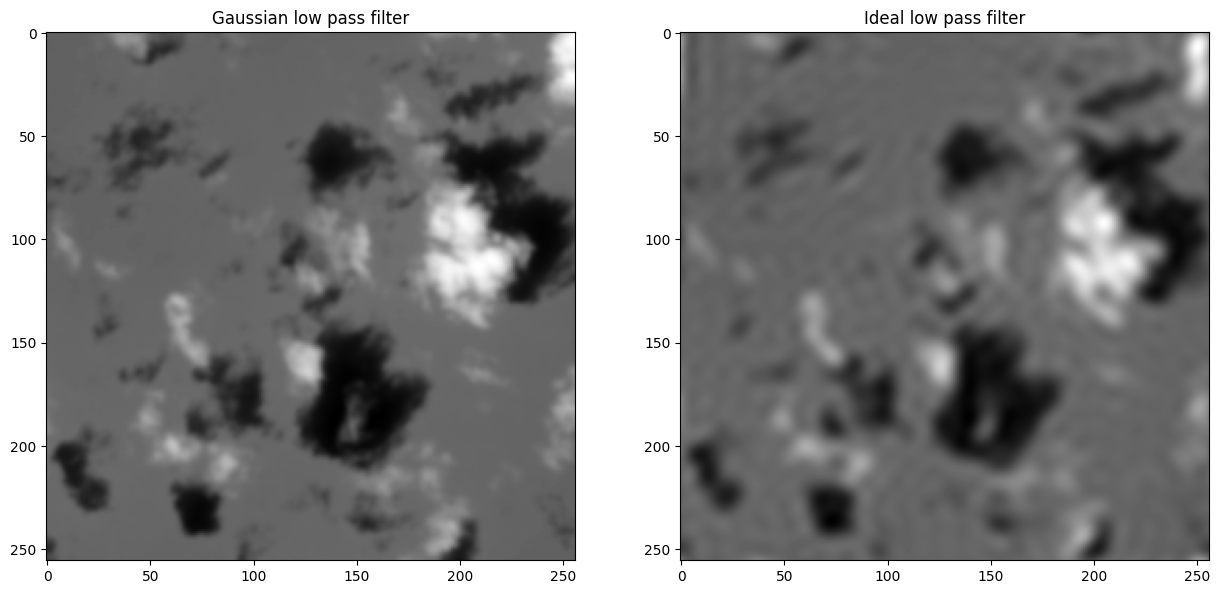

In [69]:
filtered_image = filters.gaussian(image, sigma=1)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,15))
# Display filtered image
ax1.imshow(filtered_image, cmap='gray')

# Apply Fourier Transform
freq_image = np.fft.fft2(gray)

# Define Ideal Low Pass Filter
cutoff = 20
mask = np.zeros_like(freq_image)
mask[:cutoff, :cutoff] = 1
mask[-cutoff:, :cutoff] = 1
mask[:cutoff, -cutoff:] = 1
mask[-cutoff:, -cutoff:] = 1

# Apply filter
filtered_freq_image = freq_image * mask

# Apply Inverse Fourier Transform
filtered_image = np.fft.ifft2(filtered_freq_image).real

# Display filtered image
ax2.imshow(filtered_image, cmap='gray')

ax1.set_title('Gaussian low pass filter')
ax2.set_title('Ideal low pass filter')

plt.show()